<a href="https://colab.research.google.com/github/vaishnavi-1/Electricity-theft-detection-using-ML/blob/main/ETD_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive

#Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read Data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data_final.csv')

In [ ]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

In [ ]:
Y = df['OutPut']
df.drop(['OutPut'],axis=1,inplace=True)

In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
33836    0
33837    0
33838    0
33839    0
33840    0
Name: OutPut, Length: 33841, dtype: int64

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.120,9.96,16.92,7.60,24.324,18.05,24.324,18.750,17.840,14.920
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.500,9.99,11.78,18.59,24.180,18.57,14.590,12.820,19.370,15.920
4,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,15.636,10.37,15.32,13.51,12.230,14.68,15.636,15.636,15.636,15.636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33836,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.330,2.53,2.09,3.23,2.790,2.70,2.840,3.070,2.370,2.430
33837,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,9.480,17.20,10.86,9.01,13.240,8.52,7.710,7.360,6.960,7.880
33838,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.590,5.23,3.64,4.13,4.550,3.39,3.160,4.030,3.520,4.860
33839,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000


In [ ]:
x = np.array(df)
y = np.array(Y)

In [ ]:
print(x.shape)
print(y.shape)

(33841, 1034)
(33841,)


#Split the data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27072, 1034)
(27072,)
(6769, 1034)
(6769,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
clf.score(x_test,y_test)

0.907224109912838

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6060
           1       0.61      0.32      0.42       709

    accuracy                           0.91      6769
   macro avg       0.77      0.65      0.69      6769
weighted avg       0.89      0.91      0.89      6769



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.907224109912838

In [ ]:
#Normalised False give no of correctly clasify sample
#Normalised True give percentage accuracy
count = accuracy_score(y_test, y_pred, normalize=False)

In [ ]:
print('No of correctly classify sample ',count, ' out of ',len(y_test))


No of correctly classify sample  6141  out of  6769


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


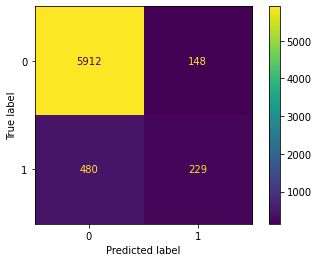

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

accuracy_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

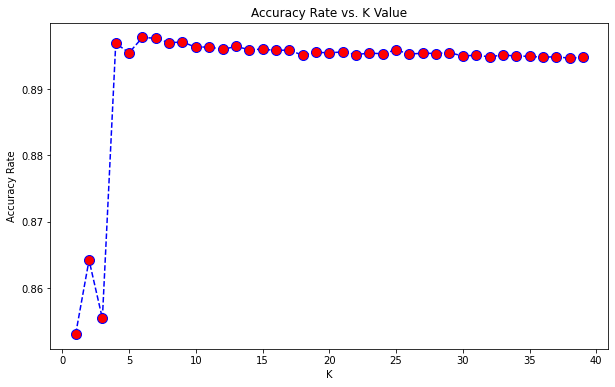

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [ ]:
clf = KNeighborsClassifier(n_neighbors=6)

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
clf.score(x_test,y_test)

0.9001329590781504

In [ ]:

grid_predictions = clf.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6060
           1       0.63      0.12      0.20       709

    accuracy                           0.90      6769
   macro avg       0.77      0.55      0.57      6769
weighted avg       0.88      0.90      0.87      6769



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


KNN Confusion matrix @80
[[6011   49]
 [ 627   82]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99191419 0.00808581]
 [0.88434415 0.11565585]]


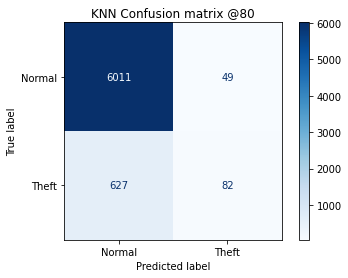

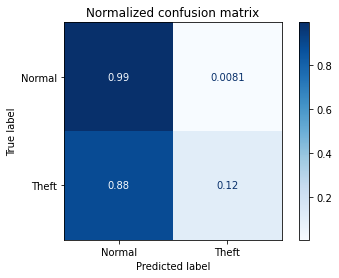

In [ ]:
  # Plot non-normalized confusion matrix
titles_options = [("KNN Confusion matrix @80", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=['Normal','Theft'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

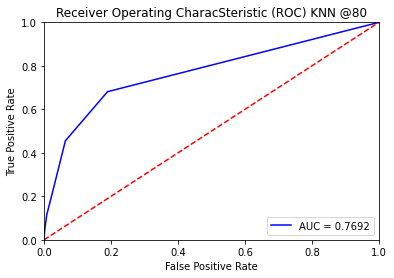

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating CharacSteristic (ROC) KNN @80')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

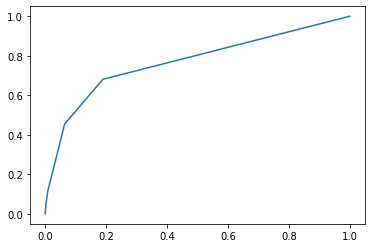

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = fpr # false_positive_rate
y = tpr # true_positive_rate

# This is the ROC curve
plt.plot(x,y)
plt.show()

# This is the AUC
auc = np.trapz(y,x)